In [1]:
import numpy as np
import itertools
from sympy import Matrix

# the following function prints the number of singular matrices and
# the total number of matrices that can be produced from the game

def count_singular_nxn_fixed_ones(n: int, ones: int):
    singular = 0
    total = 0
    for bits in itertools.product([0, 1], repeat=n*n):
        if sum(bits) != ones:
            continue
        total += 1
        if Matrix(n, n, bits).det() == 0:
            singular += 1
    return singular, total

def ones_if_player1_starts(n: int) -> int:
    return (n*n + 1) // 2   # ceil(n^2/2)

def ones_if_player0_starts(n: int) -> int:
    return (n*n) // 2       # floor(n^2/2)

In [2]:
# Example: n=3 and Player 1 starts => ones = 5
n = 2
print(count_singular_nxn_fixed_ones(n, ones_if_player1_starts(n)))

# Example: n=4 and Player 1 starts => ones = 8
n = 4
print(count_singular_nxn_fixed_ones(n, ones_if_player1_starts(n)))

(4, 6)
(7542, 12870)


In [3]:
def proportion_of_singular_matrices(n):
  singular_matrices, total_matrices = count_singular_nxn_fixed_ones(n, ones_if_player1_starts(n))
  p = singular_matrices / total_matrices
  return p

In [4]:
p1 = proportion_of_singular_matrices(1)
p2 = proportion_of_singular_matrices(2)
p3 = proportion_of_singular_matrices(3)
p4 = proportion_of_singular_matrices(4)
p = np.array([p1, p2, p3, p4])
print(p)

[0.         0.66666667 0.42857143 0.58601399]


<function matplotlib.pyplot.show(close=None, block=None)>

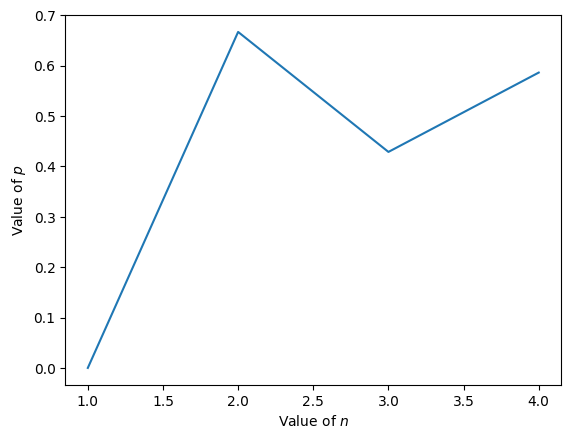

In [5]:
import matplotlib.pyplot as plt

# plotting a graph to show how the poroportion of singular matrices varies
# as the value of n increases

n = (1,2,3,4)
plt.plot(n,p)
plt.xlabel("Value of $n$")
plt.ylabel("Value of $p$") # where p is the proportion of singular matrices
                           # from all possible matrices produced from the game
plt.show

From the graph, we can see that the proportion of singular matrices rapidly increases from $n=1$ to $n=2$, decreases at $n=3$, and increases again at $n=4.$

The non-monotonic behaviour exists because two structural effects compete with each other. The vector space expands with each additional dimension so the process becomes easier to manage because there are more possible row combinations which enables users to prevent both duplicate and dependent row creation. The expansion of matrix dimensions enables additional linear relationships between rows and columns which creates more ways for matrices to reach singularity.

The above computation and graph do not show whether Player 0 can achieve victory through optimal gameplay because it does not consider the sequence of moves and the players' strategic interactions. The system delivers structural data about the occurrence of singular matrices which depends on the established limits of move counts.

So instead, we can consider the Minimax algorithm that strategically determines which player would always win.

In [6]:
from sympy import Matrix

def minimax_p0_wins(board, n, turn0):

   # board: tuple of length n^2 with values -1 (empty), 0, or 1
   # turn0: True if Player 0 to move, False if Player 1 to move
   # returns True iff Player 0 can force det(A)=0 from this position

    if -1 not in board:  # terminal position
        A = Matrix(n, n, board)
        return A.det() == 0

    empties = [i for i, v in enumerate(board) if v == -1]

    if turn0:
        # Player 0 chooses a move that guarantees a win
        for i in empties:
            new_board = list(board)
            new_board[i] = 0
            if minimax_p0_wins(tuple(new_board), n, False):
                return True
        return False
    else:
        # Player 1 chooses a move that prevents Player 0 winning
        for i in empties:
            new_board = list(board)
            new_board[i] = 1
            if not minimax_p0_wins(tuple(new_board), n, True):
                return False
        return True

def p0_wins_from_start(n):
    start = tuple([-1] * (n*n))
    return minimax_p0_wins(start, n, True)

# Example
print(p0_wins_from_start(3))

# Input is 'True' so by the minimax algorithm,
# Player 0 always wins the game when n=3.

True
